In [3]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score

# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [4]:
# Load the Iris dataset included with scikit-learn
iris_data = load_iris()

In [5]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
# Put data in a pandas DataFrame
df_iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df_iris.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [8]:
# Add target and class to DataFrame
df_iris['target']  = iris_data.target
df_iris['class'] = iris_data.target_names[iris_data.target]
df_iris.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa


In [9]:
# Show 10 random samples
df_iris.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa
100,6.3,3.3,6.0,2.5,2,virginica
40,5.0,3.5,1.3,0.3,0,setosa
86,6.7,3.1,4.7,1.5,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
71,6.1,2.8,4.0,1.3,1,versicolor


In [10]:
# now... implement the LDA (bear in mind that you do pass it the y's and it is supervised!)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
y = df_iris['target']


In [48]:
# same process as always, identify your X's and your y's
X, y = df_iris.iloc[:,:4], df_iris.iloc[:,4]



In [49]:
#train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Scale the X's

StandardScaler(copy=True, with_mean=True, with_std=True)


In [53]:
# apply the lda transformation
X_lda = lda.fit(X_train_scaled, y_train)
X_lda

LinearDiscriminantAnalysis(n_components=2)

In [54]:
# select 2 principal components
lda = LinearDiscriminantAnalysis(n_components=2)
iris_lda = lda.fit_transform(X_train_scaled,y_train)

<function matplotlib.pyplot.show(close=None, block=None)>

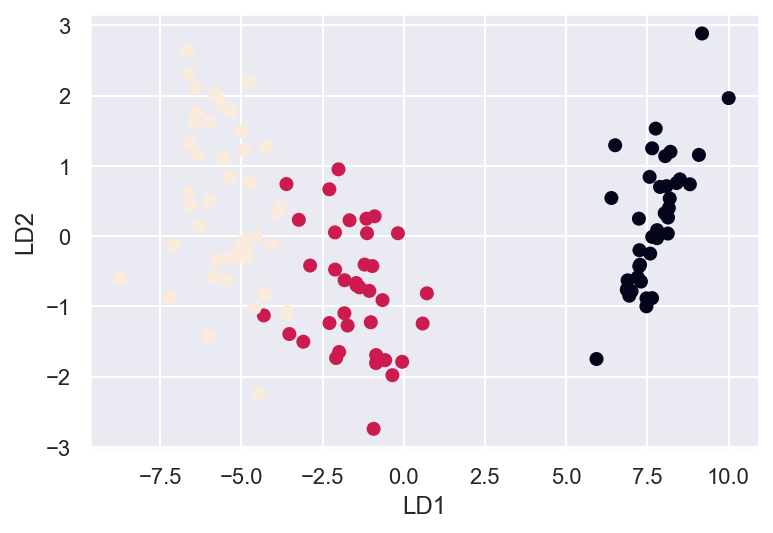

In [55]:
# take a look at the new axes for the data and plot them
new_iris = pd.DataFrame(iris_lda)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(iris_lda[:,0], iris_lda[:,1], c=y_train)
plt.show


In [72]:
# what about the variability?
X_train_prediction = lda.predict(X_train_scaled)
(X_train_prediction == y_train).sum()/len(y_train)

0.975

In [73]:
X_test_prediction = lda.predict(X_test_scaled)
(X_test_prediction == y_test).sum()/len(y_test)

1.0

In [74]:
# Run a Random Forest Classifier with the transformed data
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf_scaled = clf.fit(X_train, y_train)


In [75]:
clf_predict = clf.predict(X_train)
(clf_predict == y_train).sum()/len(y_train)

1.0

In [76]:
clf_prediction = clf.predict(X_test)
(clf_prediction == y_test).sum()/len(y_test)

1.0

In [2]:
#Check the new acuracy! Is it higher or lower than what you obtain selecting 2 features and applying a Random Forest Directly?
 